In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_labelled_october.pkl to cleaned_labelled_october.pkl


In [62]:
import pickle5 as pickle

with open('cleaned_labelled_october.pkl', 'rb') as f:
    data = pickle.load(f)


In [63]:
data.head()

,username,jobrole,instructor,companyname,timezone,meetingtitle,tag,teamsize,companysize,noguest,starttime,endtime,lastsync
0,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,Continue Personal Dev Plan,n,10,10,0,2020-07-12 14:00:00,NaT,2020-07-13
1,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,Duck Apple,n,10,10,0,2020-07-12 15:30:00,NaT,2020-07-13
2,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,🙌 Happy Monday Team Call + PM Tool review,team spirit,10,10,2,2020-07-13 12:00:00,NaT,2020-07-13
3,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,Last week's calls - Thank you notes,n,10,10,0,2020-07-13 12:45:00,NaT,2020-07-13
4,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,MM FUs,n,10,10,0,2020-07-13 13:15:00,NaT,2020-07-14


In [64]:
print(set(data['tag']))

{'?', 'one to one', 'team spirit', 'projet', 'project', 'n', 'unknown', 'broadcast', 'external', 'performance'}


In [76]:
#have a problem here as some empty entries are '?', some are 'unknown', have to fix this in the data cleaner
print(data['tag'][data['tag'] == '?'])

202    ?
206    ?
216    ?
233    ?
246    ?
296    ?
329    ?
340    ?
363    ?
395    ?
403    ?
477    ?
502    ?
515    ?
639    ?
686    ?
723    ?
Name: tag, dtype: object


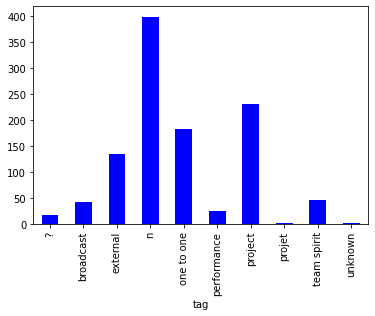

In [66]:
data.groupby('tag').meetingtitle.count().plot.bar(color='blue')

In [67]:
!pip3 install nltk
import re

#removing all but letters and spaces
def remove_punct(sentence):
  sentence = sentence.lower()
  sentence = re.sub('[^a-z]+',' ', sentence)
  return sentence

#removing stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in sw:
      new_sentence.append(word)
  return (" ".join(new_sentence))
data['meetingtitle'] = data['meetingtitle'].apply(remove_punct)
data['meetingtitle'] = data['meetingtitle'].apply(stop_word)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,username,jobrole,instructor,companyname,timezone,meetingtitle,tag,teamsize,companysize,noguest,starttime,endtime,lastsync
0,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,continue personal dev plan,n,10,10,0,2020-07-12 14:00:00,NaT,2020-07-13
1,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,duck apple,n,10,10,0,2020-07-12 15:30:00,NaT,2020-07-13
2,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,happy monday team call pm tool review,team spirit,10,10,2,2020-07-13 12:00:00,NaT,2020-07-13
3,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,last week calls thank notes,n,10,10,0,2020-07-13 12:45:00,NaT,2020-07-13
4,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,mm fus,n,10,10,0,2020-07-13 13:15:00,NaT,2020-07-14
5,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,todolist task,n,10,10,0,2020-07-13 14:30:00,NaT,2020-07-14
6,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,kevin teeroovengadum eduardo de barros,external,10,10,1,2020-07-13 15:00:00,NaT,2020-07-14
7,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,cathy chow chanel update,external,10,10,0,2020-07-13 15:30:00,NaT,2020-07-14
8,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,lunch,n,10,10,0,2020-07-13 16:00:00,NaT,2020-07-14
9,Eduardo de Barros,Founder,unknown,Neofelis,(+) 7hrs BST,mm fus,n,10,10,0,2020-07-13 17:30:00,NaT,2020-07-14


In [75]:

#extracting useful features from meeting titles
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
tfidf_features = Tfidf.fit_transform(data.meetingtitle)
tfidf_features.shape

  (0, 130)	1.0
  (2, 139)	0.4741655893344931
  (2, 16)	0.38522734612935916
  (2, 159)	0.4778727738197629
  (2, 68)	0.6311929164106718
  (3, 116)	0.5956522182820747
  (3, 175)	0.5679781839365152
  (3, 87)	0.5679781839365152
  (6, 46)	0.4172658034274802
  (6, 56)	0.4172658034274802
  (6, 4)	0.4172658034274802
  (6, 45)	0.40687796581778946
  (6, 55)	0.40687796581778946
  (6, 84)	0.38284251296585897
  (7, 168)	1.0
  (8, 93)	1.0
  (10, 49)	0.6640167868084075
  (10, 130)	0.7477176651896341
  (11, 46)	0.45167747366324484
  (11, 56)	0.45167747366324484
  (11, 4)	0.45167747366324484
  (11, 45)	0.44043295707494834
  (11, 55)	0.44043295707494834
  (13, 78)	1.0
  (18, 35)	0.7149685652242863
  :	:
  (1059, 22)	0.6672461778845545
  (1059, 159)	0.744837256116028
  (1061, 178)	0.7159943192269466
  (1061, 24)	0.6981061057136955
  (1062, 96)	0.6679254797176459
  (1062, 77)	0.7442281596015785
  (1063, 24)	1.0
  (1064, 165)	0.648541045334925
  (1064, 130)	0.7611796847761263
  (1065, 103)	1.0
  (1066, 96)	

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
DTClass = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['tag'], test_size = 1/5, random_state = 50)
DTClass.fit(X_train,y_train)
prediction = DTClass.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy score:")
print(accuracy_score(y_test, prediction))

accuracy score:
0.6990740740740741


In [72]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
svc = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['tag'], test_size = 1/5, random_state = 50)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, prediction))

accuracy score:
0.7083333333333334


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RFClass = RandomForestClassifier(n_estimators=500, criterion="gini", random_state=77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data["tag"], test_size = 1/5, random_state = 50)
RFClass.fit(X_train,y_train)
prediction = RFClass.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, prediction))

accuracy score:
0.7037037037037037
